MAE: 78.95642852783203
RMSE: 97.49303360529152
R²: -0.07543015480041504


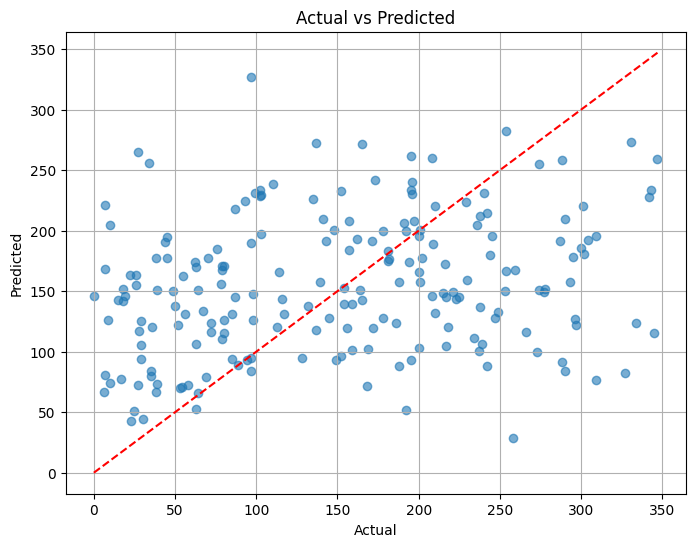

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pickle

# Load the dataset
df = pd.read_csv('my_data.csv')

# Fill missing values
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
for col in non_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    df[col] = pd.factorize(df[col])[0]  # Label encode categorical columns

# Features and target
X = df.drop('next_period_start', axis=1)
y = df['next_period_start']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# Save pipeline with pickle
with open('xgb_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


In [3]:
with open('xgb_pipeline.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Make predictions using loaded model
y_loaded_pred = loaded_model.predict(X_test)
